## Intro to Perceptrons

In [36]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Set pyplot style settings with a gray grid
plt.style.use('ggplot')

## Initial Setup - Generate 2 Clusters of Points

In [37]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]

# Create a dataset with 100 points, 2 centers, and a standard deviation of 0.4 in each cluster
X, Y = datasets.make_blobs(n_samples=n_pts, random_state=42, centers=centers, cluster_std=0.4)

In [38]:
# Plot the data
def scatterplot():
    plt.scatter(X[Y==0, 0], X[Y==0, 1], color='blue')
    plt.scatter(X[Y==1, 0], X[Y==1, 1], color='green')
    plt.show()

## Building a Perceptron

In [39]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)        # Linear function: y = Wx + b
    
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))                    # Sigmoid function: y = 1 / (1 + e^-x) on our linear function
        return pred

    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [40]:
torch.manual_seed(42)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5406, 0.5869]], requires_grad=True), Parameter containing:
tensor([-0.1657], requires_grad=True)]


In [41]:

def get_params():
    [w, b] = model.parameters()
    w1, w2 = w.view(2)
    return (w1.item(), w2.item(), b[0].item())

In [42]:
def plot_fit(title, color='r'):
    plt.title = title
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    x2 = (w1 * x1 + b1) / -w2
    plt.plot(x1, x2, color)
    scatterplot()

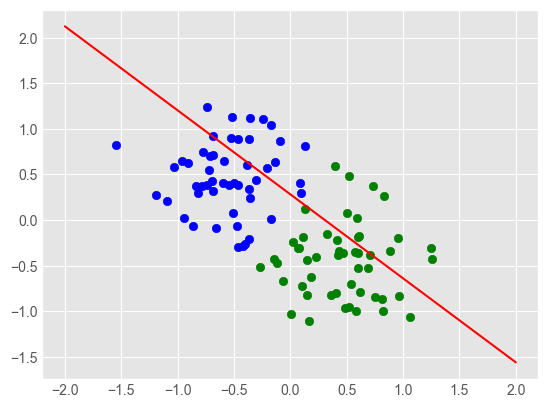

In [43]:
plot_fit('Initial Model')

## Train the Perceptron

In [44]:
# Define the loss function
criterion = nn.BCELoss()

# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Define the number of epochs
epochs = 10000

# Define the loss values
losses = []

In [45]:
for e in range(epochs):
    y_pred = model.forward(torch.tensor(X, dtype=torch.float))
    loss = criterion(y_pred, torch.tensor(Y, dtype=torch.float).view(100, 1))

    print("epoch: ", e, "loss: ", loss.item())
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


epoch:  0 loss:  0.7053977251052856
epoch:  1 loss:  0.7041975259780884
epoch:  2 loss:  0.7030007839202881
epoch:  3 loss:  0.7018075585365295
epoch:  4 loss:  0.7006177306175232
epoch:  5 loss:  0.6994314789772034
epoch:  6 loss:  0.6982485055923462
epoch:  7 loss:  0.6970691084861755
epoch:  8 loss:  0.6958929300308228
epoch:  9 loss:  0.6947203278541565
epoch:  10 loss:  0.6935510039329529
epoch:  11 loss:  0.692385196685791
epoch:  12 loss:  0.691222608089447
epoch:  13 loss:  0.6900634169578552
epoch:  14 loss:  0.6889076828956604
epoch:  15 loss:  0.6877552270889282
epoch:  16 loss:  0.6866061687469482
epoch:  17 loss:  0.6854603290557861
epoch:  18 loss:  0.684317946434021
epoch:  19 loss:  0.683178722858429
epoch:  20 loss:  0.6820430159568787
epoch:  21 loss:  0.6809103488922119
epoch:  22 loss:  0.6797810196876526
epoch:  23 loss:  0.6786550879478455
epoch:  24 loss:  0.6775323748588562
epoch:  25 loss:  0.67641282081604
epoch:  26 loss:  0.6752966046333313
epoch:  27 loss: 

Text(0.5, 0, 'epoch')

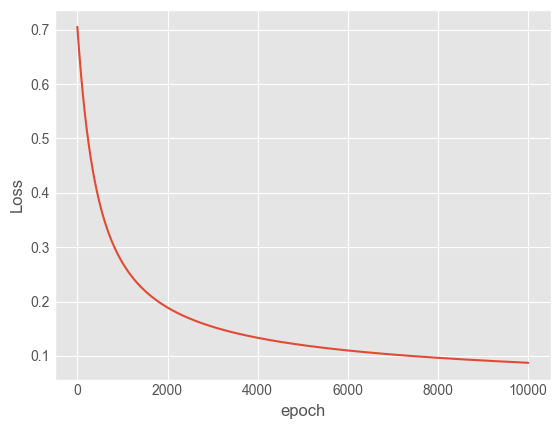

In [46]:
# Plot the loss values
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

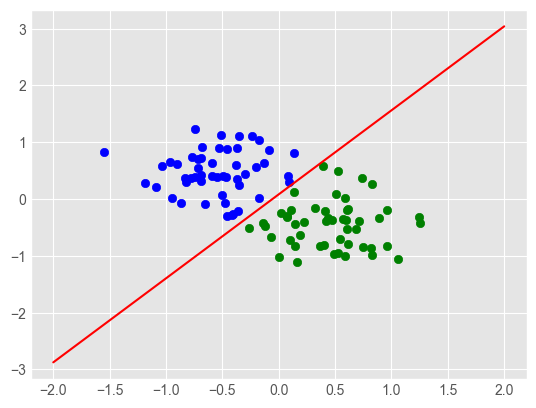

In [47]:
# Plot the final model
plot_fit('Trained Model')

## Make a Prediction & Testing the Model

Red point positive probability = 0.9996646642684937
Black point positive probability = 0.0005630773957818747
Red point in class 1
Black point in class 0


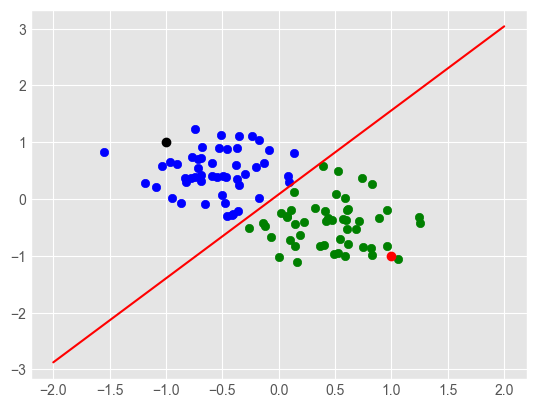

In [49]:
# Make 2 test observations
point1 = torch.tensor([1.0, -1.0])
point2 = torch.tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print("Red point positive probability = {}".format(model.forward(point1).item()))
print("Black point positive probability = {}".format(model.forward(point2).item()))
print("Red point in class {}".format(model.predict(point1)))
print("Black point in class {}".format(model.predict(point2)))
plot_fit('Trained Model')